#    Billionaires Data Analysis

## 1. Introduction

The question of what contributes to a billionaire's wealth is both complex and compelling. It reflects the interplay of various factors, from individual decisions to the broader economic environment. Our project aims to identify and understand these factors by examining the common attributes of billionaires. We're not focusing on wealth disparities across the entire economic spectrum; instead, we're zooming in on the uppermost tier of wealth to analyze what sets these individuals apart.

By identifying the features that correlate with higher wealth among billionaires, we hope to shed light on the pathways to extreme financial success. This could include industry participation, geographic location, and other socioeconomic indicators. Understanding these factors can provide valuable insights for aspiring entrepreneurs, investors, and policymakers interested in the dynamics at the pinnacle of economic achievement.

Main Topic: Investigating the Key Factors Behind Billionaires' Wealth

### 1.1Methodology

For these analysis, we use a comprehensive dataset 'Billionaires Statistics Dataset.csv' from Kaggle, which includes detailed information about global billionaires, encompassing personal attributes, business involvements, and industry sectors.



The dataset contains 2640 entries and 35 columns:

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/Billionaires Statistics Dataset.csv')
!mkdir -p outputs # making the directory for all our outputs in later analysis
print(df.shape)
df.head()

(2640, 35)


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


### 1.2 Data Cleaning

Before we start with our analysis, we will make an examination of the dataset's structure and identify any missing values.


In [270]:
dataset_info = df.info()
missing_values = df.isnull().sum()
dataset_info, missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

(None,
 age                                             65
 country                                         38
 city                                            72
 organization                                  2315
 birthDate                                       76
 firstName                                        3
 title                                         2301
 state                                         1887
 residenceStateRegion                          1893
 birthYear                                       76
 birthMonth                                      76
 birthDay                                        76
 cpi_country                                    184
 cpi_change_country                             184
 gdp_country                                    164
 gross_tertiary_education_enrollment            182
 gross_primary_education_enrollment_country     181
 life_expectancy_country                        182
 tax_revenue_country_country                    183
 tota

We then removed columns such as 'organization', 'title', 'state', and 'residenceStateRegion', which we believe are irrelevant to our analysis and contain a high number of missing entries, as part of data refinement.

The handling of missing values was twofold: For numerical columns, missing values were imputed with the column's mean, ensuring continuity in the dataset's numeric integrity. For non-numeric columns, rows containing missing values were removed.

Furthermore, data manipulation involved formatting and type conversion. The 'gdp_country' column was stripped of currency symbols and commas, and converted into a floating-point number. Additionally, the 'selfMade' column was transformed into an integer format to facilitate easier analysis and modeling in later sections.

In [271]:
columns_to_delete = ['organization', 'title', 'state', 'residenceStateRegion']
df = df.drop(columns=columns_to_delete, errors='ignore')

for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column].fillna(df[column].mean(), inplace=True) #here we do an imputation -- impute the numeric columns' missing values with their column means
    else:
        df.dropna(subset = [column], inplace=True)

# some additional manipulation for later use in modeling
df['gdp_country'] = df['gdp_country'].str.replace('$', '').str.strip().str.replace(',', '').astype(float)
df['selfMade'] = df['selfMade'].astype(int)
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


Concluding the data cleaning process, the refined dataset was saved as 'cleaned data.csv', rendering it more coherent and suitable for subsequent analytical or modeling endeavors.

In [272]:
df.to_csv('data/cleaned data.csv')

## 2. statistics summary

We have completed a set of visualizations based on the availability of data in our dataset and the relevance of certain variables (region/country, industry, age, gender) in understanding the distribution and characteristics of billionaires. Our visualizations outline how these factors interact within the context of wealth distribution and how they shape our exploration of the factors contributing to billionaire wealth.


In [273]:
#describe statistics of these billionaires
df.describe()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2.386000e+03,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2.386000e+03,2386.000000,2386.000000
mean,1276.126153,4780.762783,65.068734,0.700754,1957.301760,5.764040,12.274518,128.014542,4.419460,1.169500e+13,67.413581,102.872079,78.087938,12.548354,43.883720,5.112567e+08,34.850590,11.672491
std,744.821531,10259.707006,13.086244,0.458024,13.099918,3.711513,9.912937,26.602423,3.496774,9.582061e+12,21.410525,4.744634,3.740060,5.363464,11.992217,5.522225e+08,16.985430,87.171035
min,1.000000,1000.000000,18.000000,0.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,6.552859e+09,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,636.000000,1500.000000,56.000000,0.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,1.736426e+12,50.600000,100.200000,77.000000,9.600000,36.600000,6.705989e+07,35.861660,-95.712891
50%,1272.000000,2400.000000,65.000000,1.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,1.991000e+13,67.000000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4300.000000,74.750000,1.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,2.142770e+13,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,38.963745,104.195397
max,2540.000000,211000.000000,101.000000,1.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,2.142770e+13,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


### 2.1 columns description

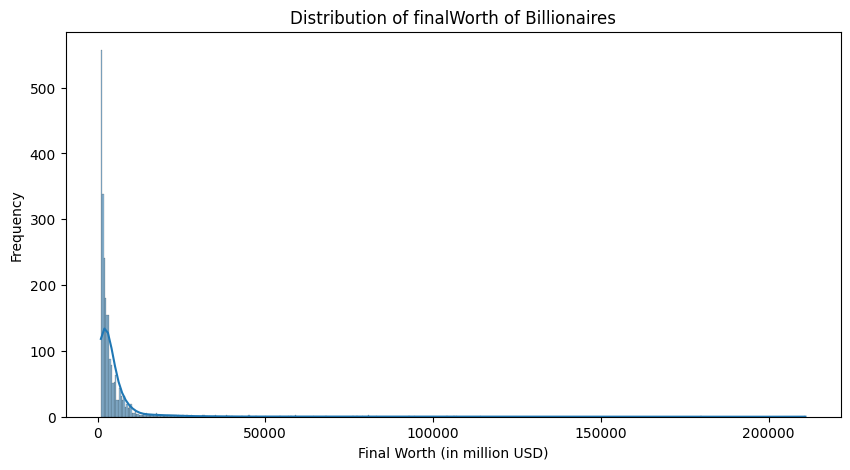

In [274]:
def plot_distribution(column_name, x_label, y_label, plot_type='hist'):
    """
    Function to plot the distribution of a specified column in a dataframe.

    Parameters:
    column_name (str): The name of the column to plot.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    plot_type (str): Type of plot - 'hist' for numerical and 'count' for categorical data.
    """
    plt.figure(figsize=(10, 5))

    if plot_type == 'hist':
        # For numerical data, use a histogram
        sns.histplot(df[column_name], kde=True)
    elif plot_type == 'count':
        # For categorical data, use a count plot
        sns.countplot(y=df[column_name], order=df[column_name].value_counts().index[:20])  # Top 20 categories

    plt.title(f'Distribution of {column_name} of Billionaires')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Corrected usage of the function
plot_distribution('finalWorth', 'Final Worth (in million USD)', 'Frequency', 'hist')


The distribution of billionaires' final worth appears to be right-skewed, indicating that a large number of billionaires have a net worth in the lower range, while a few have exceptionally high net worths.



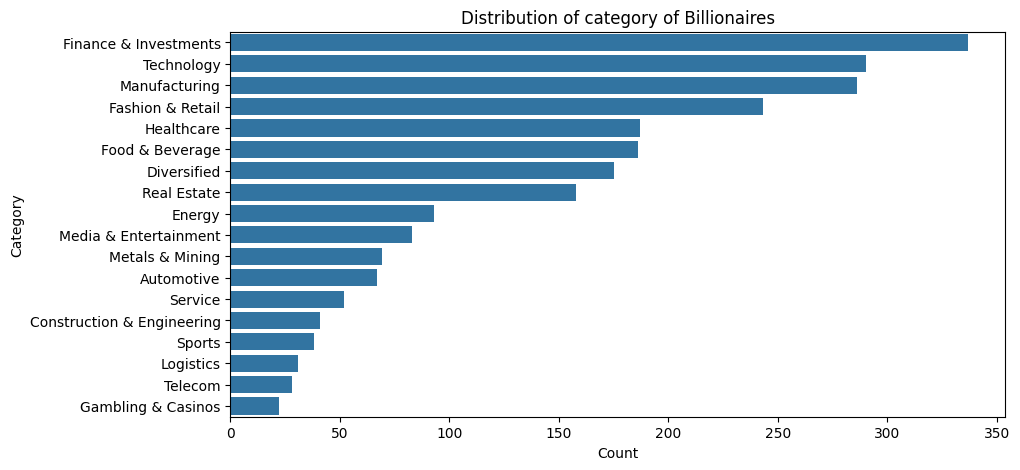

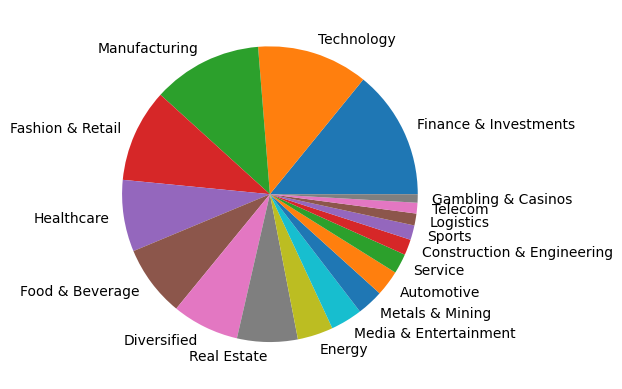

In [275]:
plot_distribution('category', 'Count', 'Category', 'count')
bills_industry = df.groupby('industries', as_index=False).size().sort_values(by='size', ascending=False)
plt.pie(bills_industry["size"], labels=bills_industry['industries'])
plt.show()

We found that certain industries are more predominant among billionaires. Industries like Technology, Fashion & Retail, and Finance & Investments have a higher representation, which could indicate these sectors' potential for significant wealth accumulation.

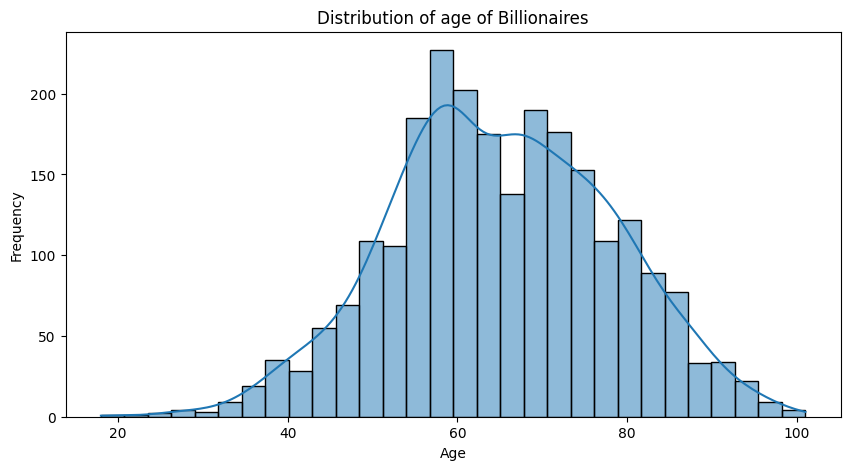

In [276]:
plot_distribution('age', 'Age', 'Frequency', 'hist')

The graph of the age distribution for billionaires indicates a median age between 60 and 70 years. The overall age range of billionaires, including outliers, is from about 20 to just over 80 years, reflecting a broad spectrum but with a focus on the middle to later years of working life.    This is consistent with the expectation that wealth accumulation is a process that typically spans many years.

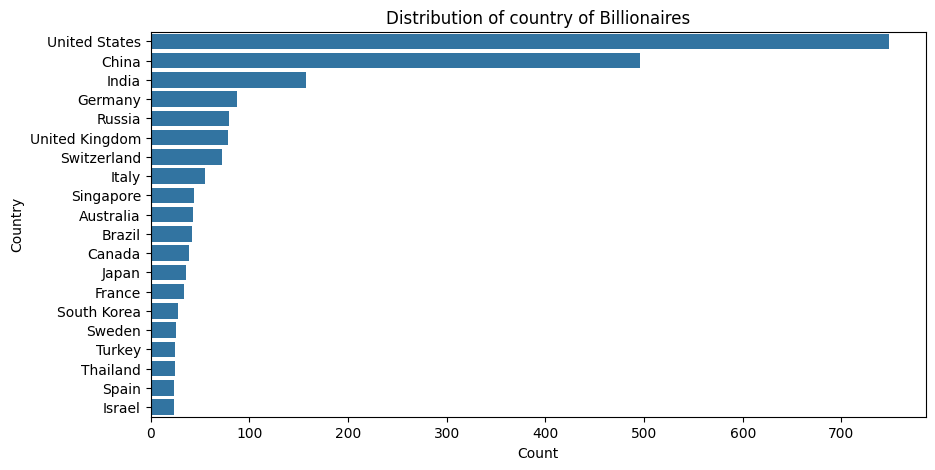

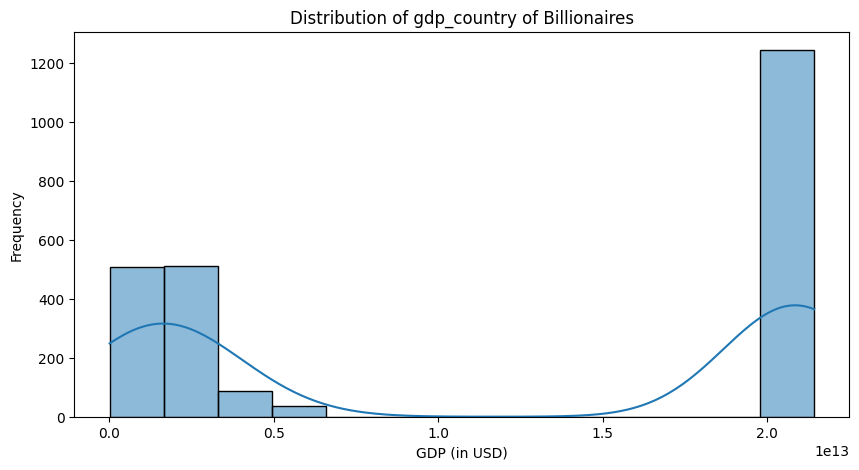

In [277]:
plot_distribution('country', 'Count', 'Country', 'count')
plot_distribution('gdp_country', 'GDP (in USD)', 'Frequency', 'hist')

The plot based on countries and their GDP shwos that certain countries have a higher concentration of billionaires.  Also, the distribution of billionaires against the GDP of their countries could indicate a correlation between the economic strength of a country and the likelihood of having billionaires.  This suggests that stronger economies provide more opportunities for massive wealth accumulation, such as the United States, might offer more opportunities for wealth creation.

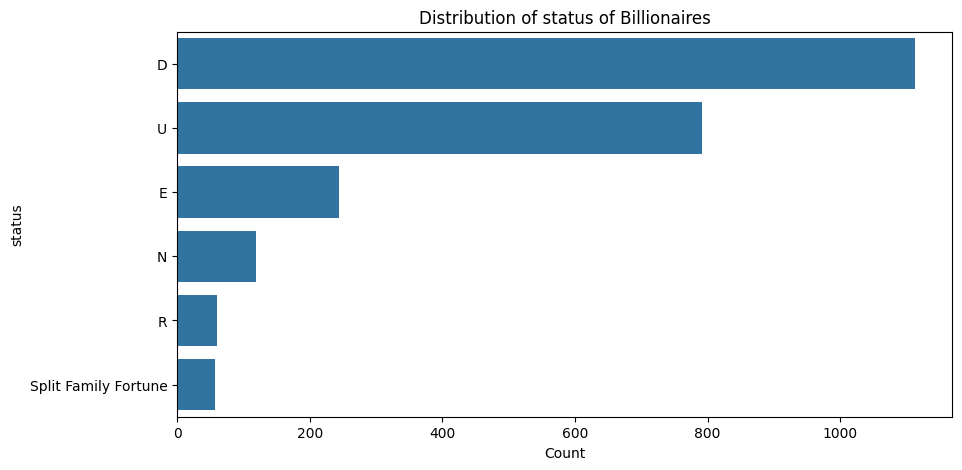

In [278]:
plot_distribution('status', 'Count', 'status', 'count')

In 'status' column, D" represents self-made billionaires (Founders/Entrepreneurs) and "U" indicates inherited or unearned wealth.

As we can see, there is a significant trend in wealth accumulation through entrepreneurial ventures and self-initiated business endeavors. The data might reflect the current global economic environment, where opportunities for entrepreneurship and innovation are abundant.


### 2.2 Age vs Industries

In the bar plot showing the number of billionaires in each industry, we find that

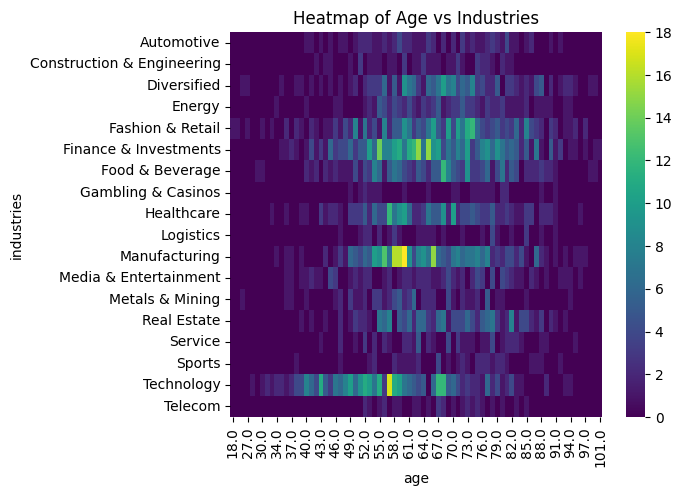

In [279]:
age_industry_pivot = pd.pivot_table(df, values='rank', index='industries', columns='age', aggfunc='count')
age_industry_pivot.fillna(0, inplace=True)

plt.figure(figsize=(6, 5))
sns.heatmap(age_industry_pivot, cmap='viridis')
plt.title('Heatmap of Age vs Industries')
plt.show()

There is a varying density of billionaires across different industries and ages. Industries known for rapid innovation, such as Technology and Fashion, tend to attract younger billionaires. This trend is likely due to the innovative and dynamic nature of these sectors, which aligns with the ambitions and energies of younger entrepreneurs. In contrast, more traditional industries like Energy are predominantly occupied by older billionaires. This could be attributed to these industries requiring more time for capital accumulation and the value placed on extensive industry experience.

### 2.3 Gender V.S. Country

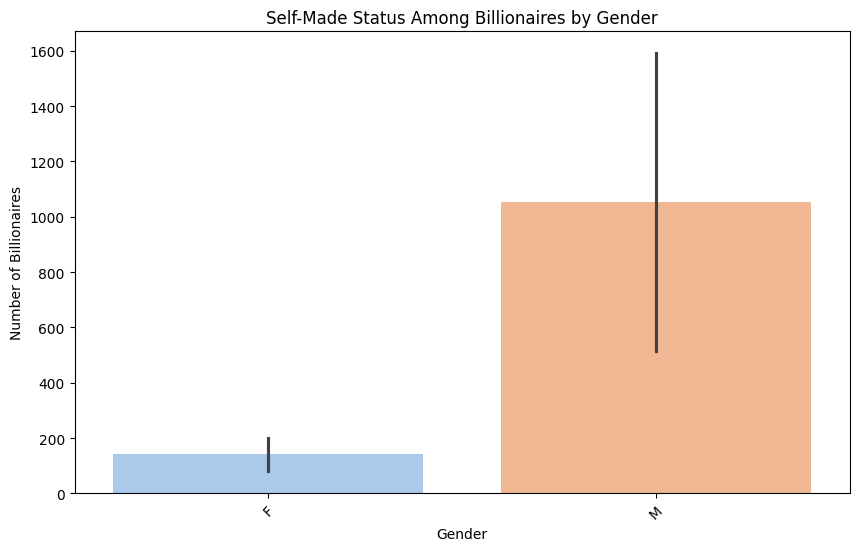

,Not Self-Made,Self-Made
gender,,
F,0.712766,0.287234
M,0.243821,0.756179


In [280]:
# Preparing data for visualization
self_made_data = df.groupby(['gender', 'selfMade']).size().unstack().fillna(0)
self_made_data.columns = ['Not Self-Made', 'Self-Made']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=self_made_data.T, palette='pastel')
plt.title('Self-Made Status Among Billionaires by Gender')
plt.ylabel('Number of Billionaires')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()

# Calculating proportions
self_made_proportions = self_made_data.div(self_made_data.sum(axis=1), axis=0)
self_made_proportions

Among female billionaires, approximately 71.28% are not self-made, while 28.72% are self-made.
In contrast, for male billionaires, 24.38% are not self-made, and 75.62% are self-made.

Based on the result, male billionaires are more likely to be self-made compared to female billionaires.  The higher proportion of self-made male billionaires may reflect various factors such as historical opportunities, access to resources, and representation in industries that have historically generated large amounts of wealth.  This gender disparity in the self-made status of billionaires highlights broader issues, including gender inequality in access to entrepreneurial opportunities and resources necessary for significant wealth creation.  ​​

### 2.3 Final Worth V.S. Country

/var/folders/76/3s8ndvb92wb2y403vv_58mkh0000gn/T/ipykernel_64497/2510409021.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


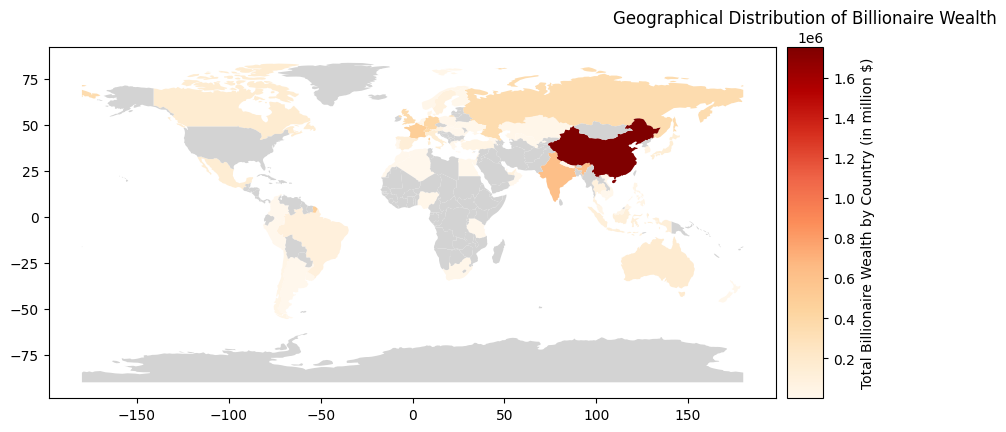

In [281]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Aggregate the total wealth of billionaires by country
wealth_by_country = df.groupby('country')['finalWorth'].sum()

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the wealth data
world = world.set_index('name').join(wealth_by_country)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='finalWorth', ax=ax, legend=True, cax=cax,
           legend_kwds={'label': "Total Billionaire Wealth by Country (in million $)"},
           cmap='OrRd', missing_kwds={'color': 'lightgrey'})

plt.title('Geographical Distribution of Billionaire Wealth')
plt.show()

The data reveals a concentration of billionaire wealth in developed regions, notably North America, Europe, and parts of Asia, especially China which reflect its rapidly growing economy and the substantial number of billionaires. This reflects the economic development and presence of wealth-generating industries like technology and finance. In contrast, developing countries exhibit far less billionaire wealth.

This underscores the impact of factors such as market size, economic policies, and business environments on wealth creation. Moreover, the presence of billionaires in emerging markets and resource-rich countries indicates diverse wealth sources beyond traditional economic hubs.

## 3. correlation analysis

Explore the relationships between different socioeconomic indicators and unobvious traits with wealth.


### 3.1 zodiac signs

Many people believe in zodiac signs as they think the time a person is born will affect his/her personality as well as success and wealth.
We will test wheter this is true by testing whether birth time, and eventually zodiac sign would influence billionaire's wealth or their count.

In [282]:
#firstly, add a column of birth months in string e.g. Jan, Feb, since we usually express months in string
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
months_dict = {}
for i in range(1,13):
    months_dict[str(i)]=months[i-1]
df['birthMonthStr']=df['birthMonth'].transform(lambda x: months_dict[str(int(x))]) #use the numeric value of months to make string categories
months_dict


{'1': 'Jan',
 '2': 'Feb',
 '3': 'Mar',
 '4': 'Apr',
 '5': 'May',
 '6': 'Jun',
 '7': 'Jul',
 '8': 'Aug',
 '9': 'Sep',
 '10': 'Oct',
 '11': 'Nov',
 '12': 'Dec'}

In [283]:
#Now make birthDate datetime to make a scatter plot for billionaires
df['dateTime'] = pd.to_datetime(df['birthDate'])
df['dateTime']

0      1949-03-05
1      1971-06-28
2      1964-01-12
3      1944-08-17
4      1930-08-30
          ...    
2635   1971-12-14
2636   1943-03-10
2637   1962-12-18
2638   1951-08-21
2639   1956-11-01
Name: dateTime, Length: 2386, dtype: datetime64[ns]

Text(0.5, 1.0, "billionaire's wealth vs birth date")

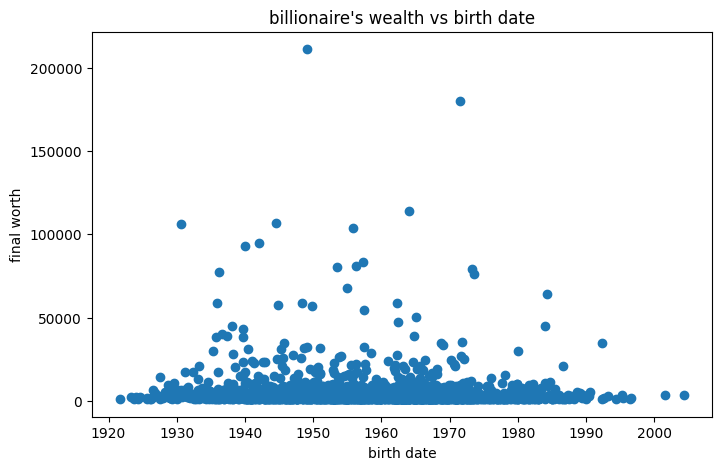

In [284]:
f, ax = plt.subplots(figsize = (8,5))
ax.scatter(df['dateTime'],df['finalWorth'])
ax.set_xlabel("birth date")
ax.set_ylabel("final worth")
ax.set_title("billionaire's wealth vs birth date")

It turns out there is no specific time frame that contains significantly much more billionaires, or much richer billionaires.

In [285]:
#Now we add a column as zodiac sign, which is obtained from the billionaires's numeric born month+date
#first we need to concatenate
def date_to_zodiac(dates):
    dates = str(dates)
    month = dates[5:7]
    date = dates[8:10]
    if date[0]==0:
        date = int(date[1:])#make date an integer
    else:
        date = int(date)
    if month == '12':
        return 'Sagittarius' if (date < 22) else 'Capricorn'

    elif month == "01":
        return 'Capricorn' if (date < 20) else 'Aquarius'

    elif month == '02':
        return 'Aquarius' if (date < 19) else 'Pisces'

    elif month == '03':
        return 'Pisces' if (date < 21) else 'Aries'

    elif month == '04':
        return 'Aries' if (date < 20) else 'Taurus'

    elif month == '05':
        return 'Taurus' if (date < 21) else 'Gemini'

    elif month == '06':
        return 'Gemini' if (date < 21) else 'Cancer'

    elif month == '07':
        return 'Cancer' if (date < 23) else 'Leo'

    elif month == '08':
        return 'Leo' if (date < 23) else 'Virgo'

    elif month == '09':
        return 'Virgo' if (date < 23) else 'Libra'

    elif month == '10':
        return 'Libra' if (date < 23) else 'Scorpio'

    elif month == '11':
        return 'Scorpio' if (date < 22) else 'Sagittarius'

In [286]:
df['Zodiac'] = df['dateTime'].transform(lambda x: date_to_zodiac(x))
df['Zodiac']

0            Pisces
1            Cancer
2         Capricorn
3               Leo
4             Virgo
           ...     
2635    Sagittarius
2636         Pisces
2637    Sagittarius
2638            Leo
2639        Scorpio
Name: Zodiac, Length: 2386, dtype: object

In [287]:
zodiac_order = ['Capricorn','Aquarius','Pisces','Aries','Taurus','Gemini','Cancer','Leo','Virgo','Libra','Scorpio','Sagittarius']

In [288]:
mean_by_zodiac = df.groupby('Zodiac')['finalWorth'].mean()
mean_by_zodiac = mean_by_zodiac.reindex(index = zodiac_order)
mean_by_zodiac

Zodiac
Capricorn      3618.924303
Aquarius       5429.487179
Pisces         5968.421053
Aries          5628.409091
Taurus         4708.125000
Gemini         4856.790123
Cancer         5494.117647
Leo            5056.684492
Virgo          4701.500000
Libra          5294.680851
Scorpio        5079.870130
Sagittarius    3714.375000
Name: finalWorth, dtype: float64

In [289]:
#rank final worth of billionaires from different zodiacs
mean_by_zodiac.sort_values(ascending=False)#Pisces has the greatest mean while Capricorn has the lowest.

Zodiac
Pisces         5968.421053
Aries          5628.409091
Cancer         5494.117647
Aquarius       5429.487179
Libra          5294.680851
Scorpio        5079.870130
Leo            5056.684492
Gemini         4856.790123
Taurus         4708.125000
Virgo          4701.500000
Sagittarius    3714.375000
Capricorn      3618.924303
Name: finalWorth, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


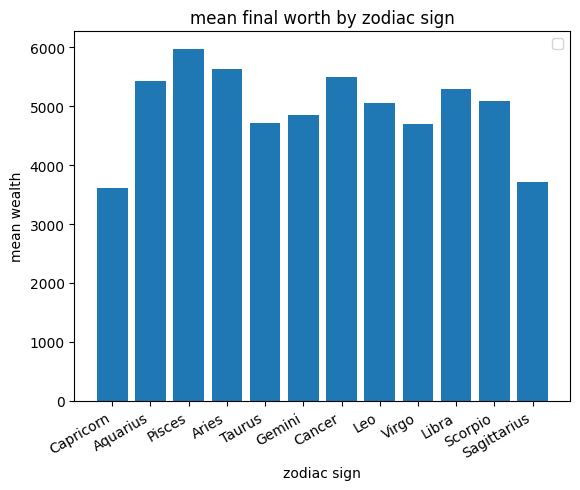

In [290]:
#plot bar plot of mean wealth for billionaires from different zodiacs
f, ax = plt.subplots()
ax.bar(mean_by_zodiac.index, mean_by_zodiac)
ax.set_xlabel("zodiac sign")
ax.set_ylabel("mean wealth")
ax.set_title("mean final worth by zodiac sign")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.legend()

In [291]:
#count number of billionaires by zodiac sign
num_bill_by_zodiac = df.groupby('Zodiac').size()
num_bill_by_zodiac = num_bill_by_zodiac.reindex(index = zodiac_order)
num_bill_by_zodiac

Zodiac
Capricorn      502
Aquarius       156
Pisces         171
Aries          176
Taurus         160
Gemini         162
Cancer         170
Leo            187
Virgo          200
Libra          188
Scorpio        154
Sagittarius    160
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


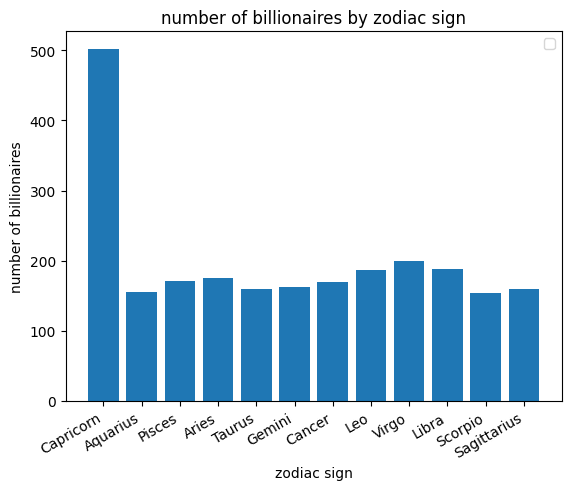

In [292]:
#plot bar plot of number of billionaires from different zodiacs
f, ax = plt.subplots()
ax.bar(num_bill_by_zodiac.index, num_bill_by_zodiac)
ax.set_xlabel("zodiac sign")
ax.set_ylabel("number of billionaires")
ax.set_title("number of billionaires by zodiac sign")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.legend()

We have observed that although the billionaires from Capricorn has the lowest mean final worth, their number is significantly greater than the number of billioanaires from other zodiac signs.

### 3.2 Family business vs. personal business

We want to do this topic because we are aware that under the personName column of the data frame, there are several personal names concatenated with the "& family" suffix, meaning they are owning a family business. Hence, we can group the data by personal business vs. family business and show their statistics and plot them.

In [293]:
def whether_fam(person_name:str):
    if "family" in person_name:
        return "family business"
    else:
        return "personal business"

In [294]:
df['businessType'] = df['personName'].transform(lambda x: whether_fam(x))

In [295]:
business_group = df.groupby('businessType')
business_group.size()#there are ~2100 personal business and ~300 family business, quite enough for doing statistical analysis.

businessType
family business       312
personal business    2074
dtype: int64

In [296]:
business_group.describe()

rank                                                   \
                    count         mean  min    25%     50%     75%     max   
businessType                                                                 
family business     312.0  1145.804487  1.0  466.0  1067.0  1804.0  2540.0   
personal business  2074.0  1295.730955  2.0  659.0  1312.0  1905.0  2540.0   

                              finalWorth               ... longitude_country  \
                          std      count         mean  ...               max   
businessType                                           ...                     
family business    754.923865      312.0  6683.653846  ...        138.252924   
personal business  741.493778     2074.0  4494.503375  ...        174.885971   

                             dateTime                                 \
                         std    count                           mean   
businessType                                                           
family business    81.001538      312  1952-08-19 02:04:36.923076928   
personal business  87.732356     2074  1958-06-30 12:49:24.705882368   

                                                             \
                                   min                  25%   
businessType                                                  
family business    1926-02-10 00:00:00  1943-02-28 12:00:00   
personal business  1921-09-11 00:00:00  1949-02-09 12:00:00   

                                                             \
                                   50%                  75%   
businessType                                                  
family business    1952-03-11 00:00:00  1963-01-01 00:00:00   
personal business  1958-11-27 00:00:00  1967-06-05 18:00:00   

                                             
                                   max  std  
businessType                                 
family business    1987-01-01 00:00:00  NaN  
personal business  2004-05-06 00:00:00  NaN  

[2 rows x 152 columns]

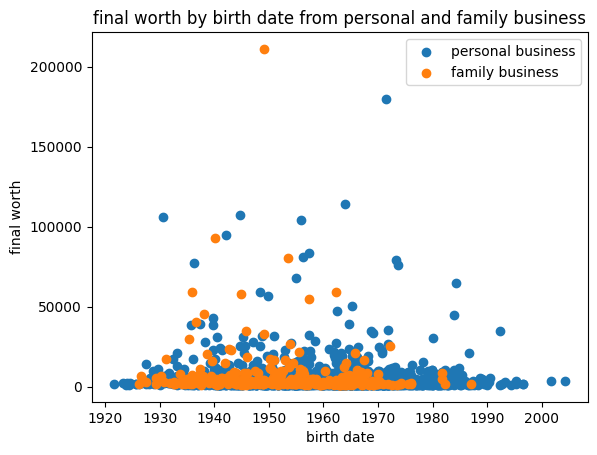

In [297]:
#now we scatter birth date vs. final worth for each billionaires from personal and family business
family_birth = df[df['businessType']=='family business']['dateTime']
family_worth = df[df['businessType']=='family business']['finalWorth']
personal_birth = df[df['businessType']=='personal business']['dateTime']
personal_worth = df[df['businessType']=='personal business']['finalWorth']
f, ax = plt.subplots()
ax.scatter(personal_birth,personal_worth, label = "personal business")
ax.scatter(family_birth,family_worth,label = "family business")
ax.set_xlabel("birth date")
ax.set_ylabel("final worth")
ax.set_title("final worth by birth date from personal and family business")
ax.legend()

According to the graph above, although we cannot observe a notable difference between the final worth of the billionaires who owns personal businss and those who owns family business, it is obvious that they differ in birth date -- most of the billionaires born after the year 1980 own pesonal business rather than family business. This may be because family business are always being controled by the elderly people in a whole famly.

### 3.3 self-made vs inherited

We have the column selfMade in which 1 means the business is started by the billionaire himself and 0 means the wealth is inherited from others

In [298]:
df.groupby('selfMade')['finalWorth'].mean()

selfMade
0    5285.294118
1    4565.311005
Name: finalWorth, dtype: float64

In [299]:
df.groupby('selfMade').size()

selfMade
0     714
1    1672
dtype: int64

Apparently, most of the business from those billionaires are selfmade.

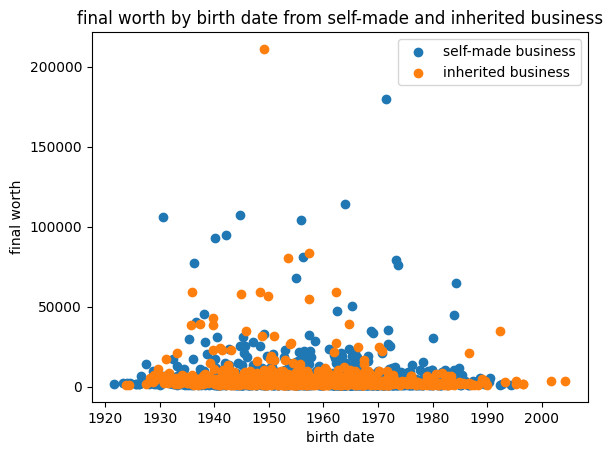

In [300]:
#now we scatter birth date vs. final worth for each billionaires from personal and family business
selfmade_birth = df[df['selfMade']==1]['dateTime']
selfmade_worth = df[df['selfMade']==1]['finalWorth']
inherited_birth = df[df['selfMade']==0]['dateTime']
inherited_worth = df[df['selfMade']==0]['finalWorth']
f, ax = plt.subplots()
ax.scatter(selfmade_birth,selfmade_worth, label = "self-made business")
ax.scatter(inherited_birth,inherited_worth,label = "inherited business")
ax.set_xlabel("birth date")
ax.set_ylabel("final worth")
ax.set_title("final worth by birth date from self-made and inherited business")
ax.legend()

From the graph, we can tell that there is no notable difference between self-made and inherited businss in terms of either birth date or final worth.

In [301]:
df['gdp_country']

0       2.715518e+12
1       2.142770e+13
2       2.142770e+13
3       2.142770e+13
4       2.142770e+13
            ...     
2635    1.991000e+13
2636    2.142770e+13
2637    1.991000e+13
2638    1.991000e+13
2639    3.767955e+11
Name: gdp_country, Length: 2386, dtype: float64

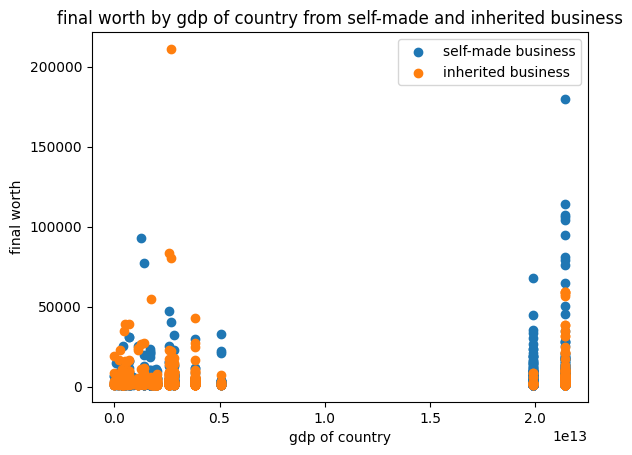

In [302]:
#now we scatter final worth by gdp of country from self-made and inherited business
selfmade_birth = df[df['selfMade']==1]['gdp_country']
selfmade_worth = df[df['selfMade']==1]['finalWorth']
inherited_birth = df[df['selfMade']==0]['gdp_country']
inherited_worth = df[df['selfMade']==0]['finalWorth']
f, ax = plt.subplots()
ax.scatter(selfmade_birth,selfmade_worth, label = "self-made business")
ax.scatter(inherited_birth,inherited_worth,label = "inherited business")
ax.set_xlabel("gdp of country")
ax.set_ylabel("final worth")
ax.set_title("final worth by gdp of country from self-made and inherited business")
ax.legend()

From the graph above, we can observe that for the countries of high gdp i.e. greater and equal than 2e+13, the proportion of self-made business become much higher than those that are being inherited, while for country of low gdp i.e. lower and equal than 0.5e+13, there are no notable difference between the proportion of self-made and inherited business.

## 4. Modeling

clustering or regression analysis to predict the wealth distribution

In [303]:
from sklearn.preprocessing import LabelEncoder
import helper.regression_functions as reg_func # our own regression library
import helper.clustering_functions as cf # our own clustering library
data = df.copy()

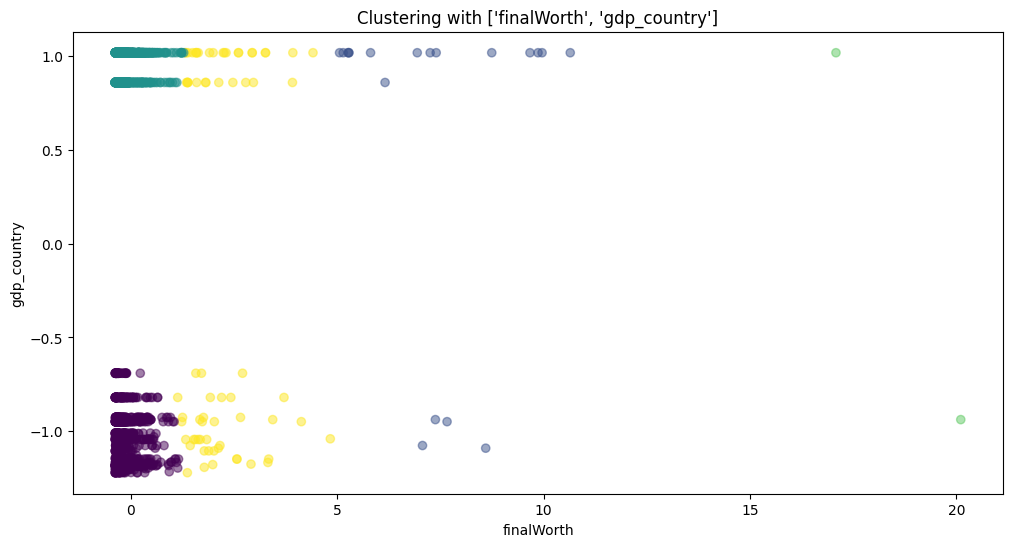

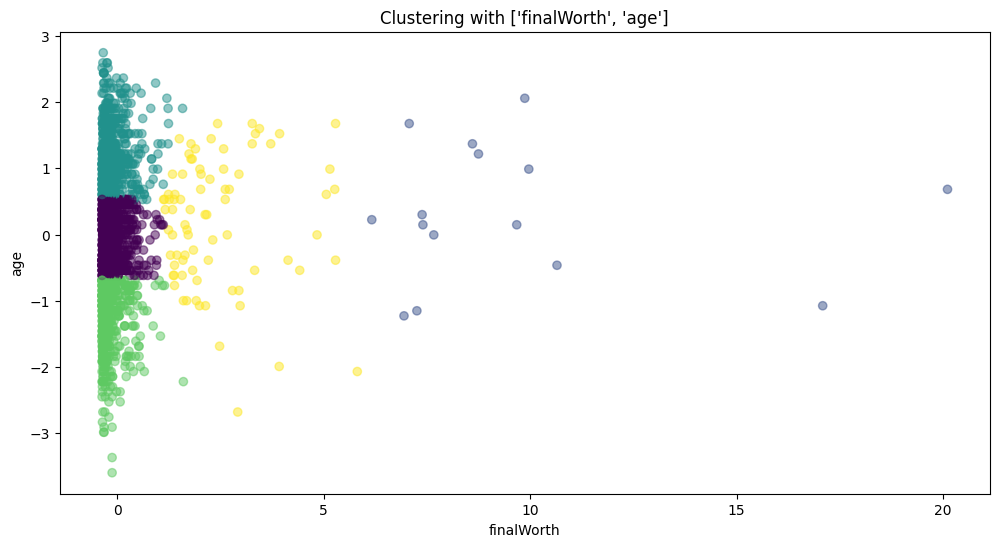

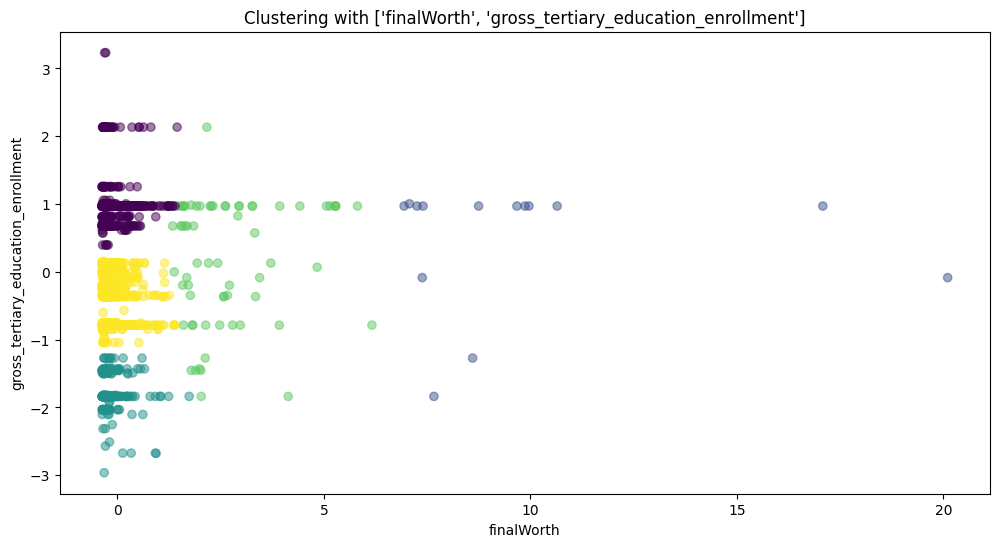

In [304]:
feature_set_1 = ['finalWorth', 'gdp_country']
feature_set_2 = ['finalWorth', 'age']
feature_set_3 = ['finalWorth', 'gross_tertiary_education_enrollment']

# Preprocess and cluster for each feature set
for feature_set in [feature_set_1, feature_set_2, feature_set_3]:
    preprocessed_data = cf.preprocess_data_for_clustering(data, feature_set)
    cluster_labels = cf.perform_kmeans_clustering(preprocessed_data, n_clusters=5)
    cf.plot_clusters(preprocessed_data, cluster_labels, title=f'Clustering with {feature_set}');

In [305]:
# Selecting our single feature for simple OLS regression
simple_feature = 'age'
target = 'finalWorth'

# Performing simple OLS regression
simple_ols_model = reg_func.perform_simple_ols(data, target, simple_feature)

# Displaying model results
simple_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.856
Date:                Tue, 12 Dec 2023   Prob (F-statistic):            0.00295
Time:                        19:10:17   Log-Likelihood:                -25418.
No. Observations:                2386   AIC:                         5.084e+04
Df Residuals:                    2384   BIC:                         5.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1677.2535   1063.752      1.577      0.115    -408.721    3763.228
x1            47.6959     16.027      2.976      0.003      16.267      79.125
==============================================================================
Omnibus:                     3712.587   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1848289.184
Skew:                           9.699   Prob(JB):                         0.00
Kurtosis:                     137.963   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

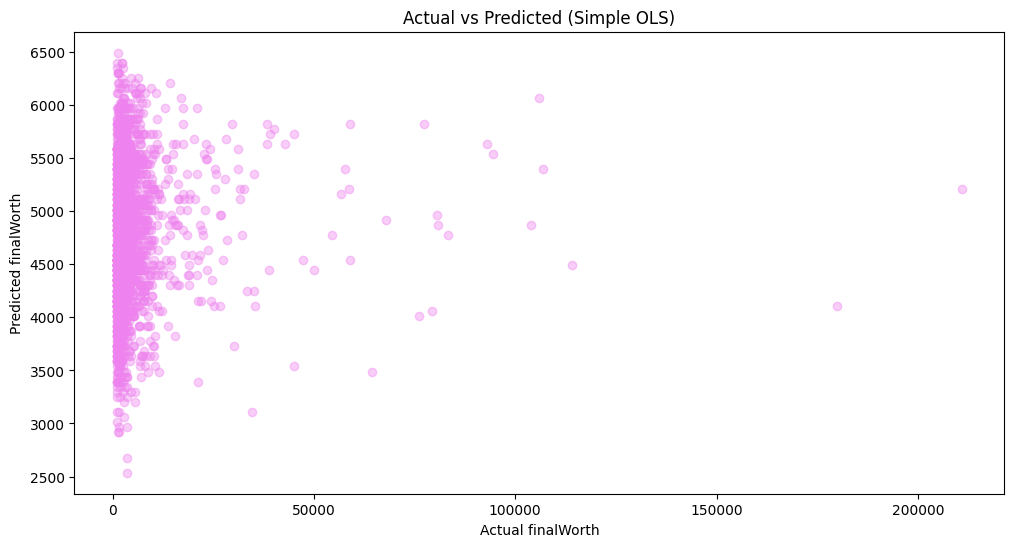

In [306]:
# Plot actual vs. predicted values for simple OLS
reg_func.plot_actual_vs_predicted(simple_ols_model, data, target='finalWorth', feature='age')

In [307]:
# Handling categorical variables using Label Encoding
label_encoders = {}
categorical_columns = ['countryOfCitizenship', 'industries', 'gender']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Features for multiple linear regression
multiple_features = ['age', 'countryOfCitizenship', 'selfMade', 'industries', 'gender', 'cpi_country',
                     'gdp_country', 'gross_tertiary_education_enrollment',
                     'gross_primary_education_enrollment_country', 'life_expectancy_country',
                     'total_tax_rate_country', 'population_country']

# Performing multiple linear regression
multiple_ols_model = reg_func.perform_multiple_ols(data, target, multiple_features)

# Displaying the summary of the multiple linear regression model
multiple_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.801
Date:                Tue, 12 Dec 2023   Prob (F-statistic):            0.00124
Time:                        19:10:17   Log-Likelihood:                -25407.
No. Observations:                2386   AIC:                         5.084e+04
Df Residuals:                    2374   BIC:                         5.091e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       1.981e+04   1.33e+04      1.486      0.137   -6332.427     4.6e+04
age                                           39.4647     16.534      2.387      0.017       7.043      71.886
countryOfCitizenship                           3.4420     14.563      0.236      0.813     -25.115      31.999
selfMade                                    -764.9556    519.477     -1.473      0.141   -1783.631     253.720
industries                                     5.2124     46.186      0.113      0.910     -85.356      95.781
gender                                       280.1924    693.806      0.404      0.686   -1080.337    1640.722
cpi_country                                  -24.1264     14.878     -1.622      0.105     -53.303       5.050
gdp_country                                 7.275e-11   4.68e-11      1.556      0.120    -1.9e-11    1.64e-10
gross_tertiary_education_enrollment           -0.3951     17.720     -0.022      0.982     -35.143      34.353
gross_primary_education_enrollment_country    -4.2786     53.618     -0.080      0.936    -109.422     100.865
life_expectancy_country                     -194.8653    117.395     -1.660      0.097    -425.073      35.342
total_tax_rate_country                        34.3946     27.336      1.258      0.208     -19.210      87.999
population_country                         -2.106e-06   9.49e-07     -2.218      0.027   -3.97e-06   -2.44e-07
==============================================================================
Omnibus:                     3705.070   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1837630.940
Skew:                           9.659   Prob(JB):                         0.00
Kurtosis:                     137.577   Cond. No.                     9.64e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

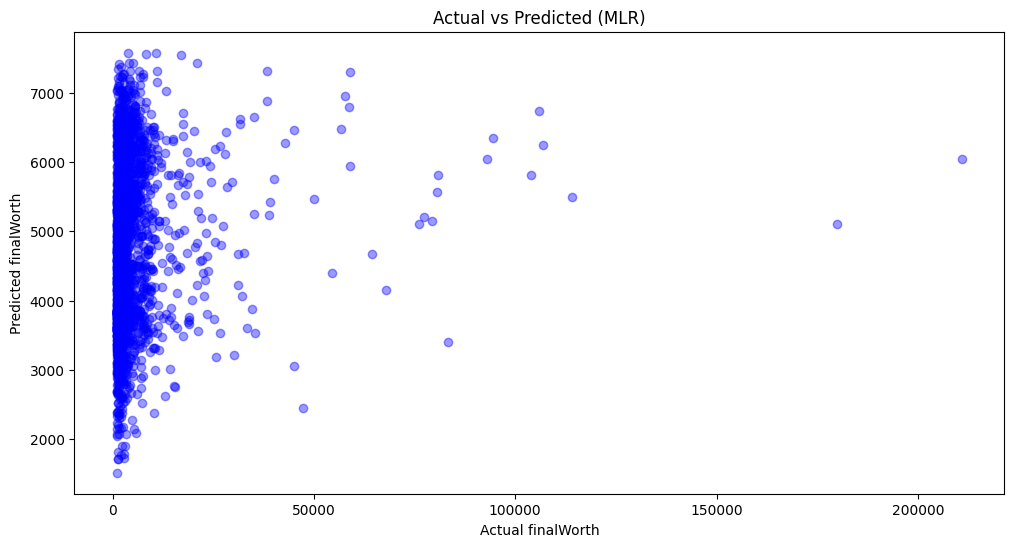

In [308]:
# Plot actual vs. predicted values for multiple OLS
reg_func.plot_actual_vs_predicted(multiple_ols_model, data,target='finalWorth', feature=multiple_features)

## Results

In our project, we delved into regression and clustering models to unravel the factors contributing to a billionaire's wealth. Starting with regression analysis, our approach included both simple and multiple OLS regressions. The simple OLS regression examined the potential predictive power of age on net worth, but the results showed a weak correlation. The low R-squared value from this analysis indicated that age alone isn't a strong predictor of a billionaire's wealth.

Expanding our model to include a variety of variables, we performed a multiple OLS regression in the hopes of capturing a more comprehensive picture. Despite the inclusion of several potential predictors, the outcome remained similar to the simple regression, with the model explaining a small fraction of the variance in net worth. This suggested that the predictors chosen did not significantly influence the wealth of billionaires, implying that their fortunes are likely influenced by factors more complex than our model could capture.

We also employed clustering analysis to discern any natural groupings of billionaires based on their financial worth and related socioeconomic indicators. The intent was to identify distinct clusters that might reveal patterns in wealth accumulation. However, the clustering did not yield clear distinctions among the groups. The lack of well-defined clusters led us to conclude that the distribution of wealth among billionaires might not be easily segmented by the selected features.

The overarching conclusion from our modeling efforts is that wealth, especially at the scale of billionaires, is a complex phenomenon that cannot be easily decoded through linear models or simple clustering. It's probable that an intricate interplay of diverse factors, potentially including personal attributes, market dynamics, and even serendipity, contribute to the vast fortunes amassed by billionaires. Our analysis underscores the need for more nuanced models and perhaps a broader set of both quantitative and qualitative data to truly understand the engines of wealth generation at this level.

## Project Conclusion:

Throughout our investigation into the financial echelons of global billionaires, it became clear that the world of billionaires is marked by its uniqueness and complexity. The efforts to model and predict the wealth of these individuals have led us to a humbling conclusion: billionaires, by their very nature and the diversity of their paths to wealth, defy simple categorization and prediction.

Our regression models, both simple and multiple, did not reveal any significant predictors that could reliably estimate a billionaire's net worth. Similarly, our clustering attempts did not present any discernible patterns, suggesting that the factors contributing to such extraordinary levels of wealth are manifold and not easily captured through standard statistical models.

The distinctiveness of each billionaire's journey—shaped by a unique blend of personal attributes, market conditions, timing, and perhaps an element of chance—poses a challenge for any analytical model looking for trends and commonalities. These findings lead us to believe that while data-driven approaches can provide insights into average economic behaviors, they may fall short when applied to the outliers on the wealth spectrum, such as billionaires.

In essence, the rarity and exclusivity that characterize the billionaire club also render its members' financial trajectories as something close to sui generis. While this poses a considerable challenge to predictive analytics, it also opens the door to more creative and interdisciplinary approaches to understanding wealth accumulation. For future studies, a blend of economic theory, behavioral finance, and perhaps narrative biographical analysis may be required to gain a deeper understanding of how billionaires amass and maintain their fortunes.